In [126]:
import numpy as np

from scipy.stats import gmean,hmean

from plotly.offline import iplot
import plotly.graph_objects as go

def rms(x):
    return np.sqrt(np.mean(x**2))


# Fixed distance example

In [166]:
n = 10
mu= 10
sigma=1

t_i = sigma * np.random.randn(n) + mu
x_i = 10
v_i = x_i/t_i

harmonic_mean_v = hmean(v_i)
arithmetic_mean_v = np.mean(v_i)
geometric_mean_v = gmean(v_i)

In [169]:
harmonic_mean_v, arithmetic_mean_v, geometric_mean_v

(1.0095321440315208, 1.0159771881070556, 1.012693620730861)

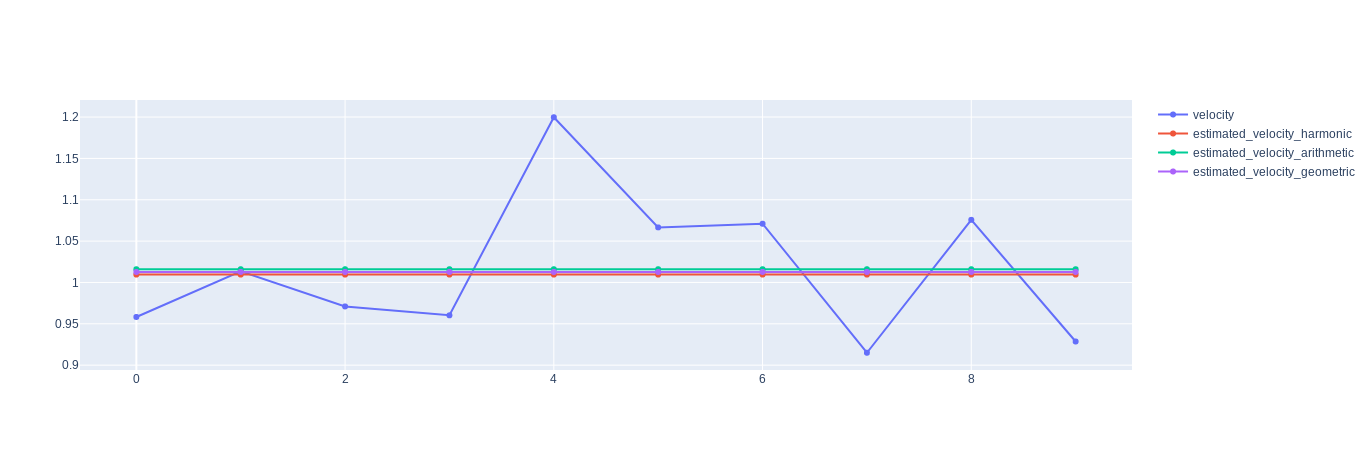

In [168]:
iplot(go.Figure(data=[go.Scatter(x=list(range(n)),y=v_i,name='velocity'),
                     go.Scatter(x=list(range(n)),y=[harmonic_mean_v for i in range(n)],name='estimated_velocity_harmonic'),
                     go.Scatter(x=list(range(n)),y=[arithmetic_mean_v for i in range(n)],name='estimated_velocity_arithmetic'),
                       go.Scatter(x=list(range(n)),y=[geometric_mean_v for i in range(n)],name='estimated_velocity_geometric')
                     ]))

In [143]:
rms(v_i - harmonic_mean_v)

0.015562206412043693

In [144]:
rms(v_i - arithmetic_mean_v)

0.015093337734424039

# Fixed time example

In [164]:
n = 100
mu= 10
sigma=1

x_i = sigma * np.random.randn(n) + mu
t_i = 10
v_i = x_i/t_i

harmonic_mean_v = hmean(v_i)
arithmetic_mean_v = np.mean(v_i)
geometric_mean_v = gmean(v_i)

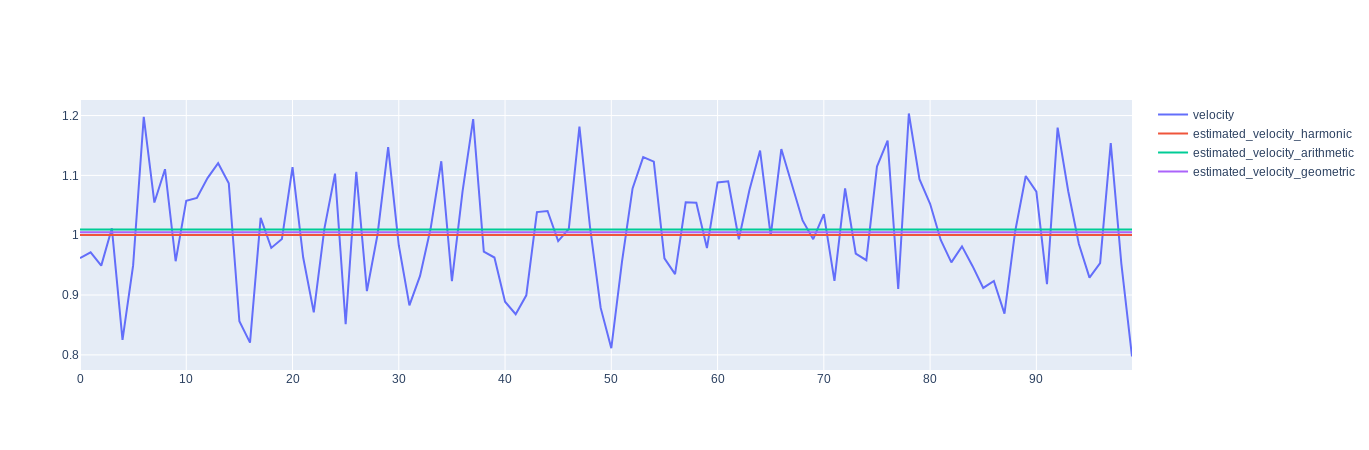

In [165]:
iplot(go.Figure(data=[go.Scatter(x=list(range(n)),y=v_i,name='velocity'),
                     go.Scatter(x=list(range(n)),y=[harmonic_mean_v for i in range(n)],name='estimated_velocity_harmonic'),
                     go.Scatter(x=list(range(n)),y=[arithmetic_mean_v for i in range(n)],name='estimated_velocity_arithmetic'),
                       go.Scatter(x=list(range(n)),y=[geometric_mean_v for i in range(n)],name='estimated_velocity_geometric')
                     ]))

# Population example

In [186]:
horizon = 150
mu=1.1
sigma=0.2
alpha_t = sigma * np.random.randn(horizon) + mu

geometric_mean_alpha = gmean(alpha_t)
arithmetic_mean_alpha = np.mean(alpha_t)
harmonic_mean_alpha = hmean(alpha_t)

In [187]:
geometric_mean_alpha, arithmetic_mean_alpha, harmonic_mean_alpha

(1.079455814042616, 1.0972278532935908, 1.061289376637652)

In [188]:
initial_population = 10
population = [initial_population]
estimated_population_geometric = [initial_population]
estimated_population_arithmetic = [initial_population]
estimated_population_harmonic = [initial_population]

for i in range(horizon):
    population.append(population[-1]*alpha_t[i])
    estimated_population_geometric.append(estimated_population_geometric[-1]*geometric_mean_alpha)
    estimated_population_arithmetic.append(estimated_population_arithmetic[-1]*arithmetic_mean_alpha)
    estimated_population_harmonic.append(estimated_population_harmonic[-1]*harmonic_mean_alpha)

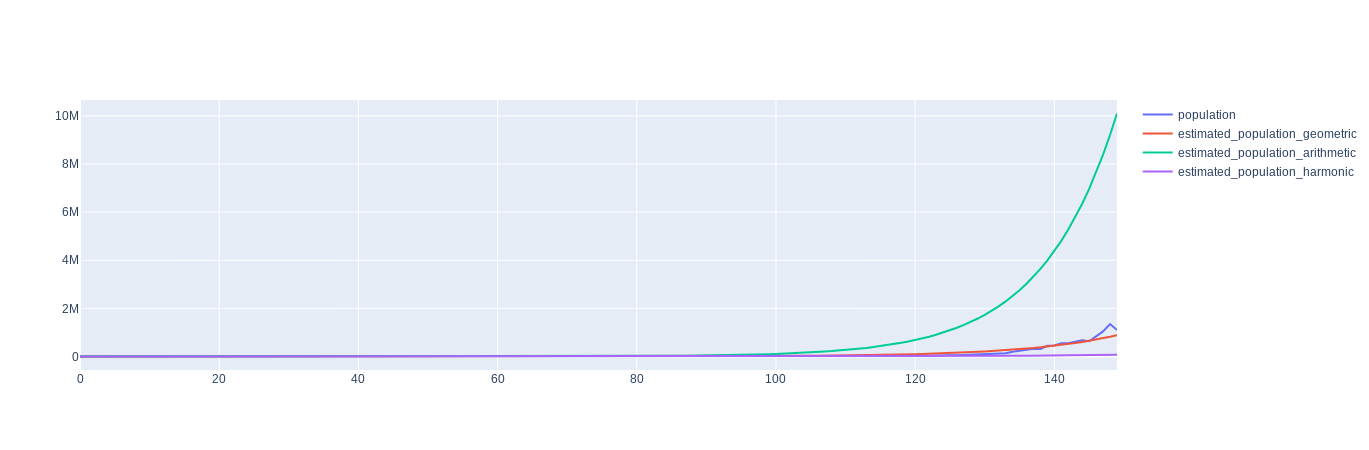

In [189]:
iplot(go.Figure(data=[go.Scatter(x=list(range(horizon)),y=population,name='population'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_geometric,name='estimated_population_geometric'),
                     go.Scatter(x=list(range(horizon)),y=estimated_population_arithmetic,name='estimated_population_arithmetic'),
                      go.Scatter(x=list(range(horizon)),y=estimated_population_harmonic,name='estimated_population_harmonic')]))